In [3]:
# Import libraries that are required to run your project
# You are allowed to add more libraries as you need

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import zipfile
import matplotlib.pyplot as plt
import pyBigWig

# Project 1 : Prediction of Gene Expression from Chromatin Landscape

The following notebook ...

#### Use the following data for feature engineering:
-
-
-

## Work Package 1.1 - Modeling Choices & Data Pre-processing

In [21]:
# TODO: 
# Load your feature (bed and/or bigwig and/or fasta) and target files (tsv) here. bed are binary files.
# Decide which features to use for training. Feel free to process them however you need.

# NOTE: 
# bed and bigwig files contain signals of all chromosomes (including sex chromosomes).
# Training and validation split based on chromosomes has been done for you. 
# However, you can resplit the data in any way you want.

#path_data = "./"  # TODO
#path_test = "/path/to/test/info/file"   # X3_test_info.tsv ; TODO
#test_genes = pd.read_csv(path_test, sep='\t')
# ---------------------------INSERT CODE HERE---------------------------
""""
The following notebook ...
""""
#we unzip the files on bash


# ---------------------------------------------------------------------- 

['CAGE-train/', 'CAGE-train/X1_train_y.tsv', '__MACOSX/CAGE-train/._X1_train_y.tsv', 'CAGE-train/X3_test_info.tsv', '__MACOSX/CAGE-train/._X3_test_info.tsv', 'CAGE-train/X2_train_y.tsv', 'CAGE-train/X1_val_y.tsv', 'CAGE-train/X2_val_info.tsv', 'CAGE-train/X1_val_info.tsv', 'CAGE-train/X2_val_y.tsv', 'CAGE-train/X2_train_info.tsv', 'CAGE-train/X1_train_info.tsv', '__MACOSX/CAGE-train/._X1_train_info.tsv']
  gene_name    chr  gene_start   gene_end  TSS_start    TSS_end strand
0   SLC20A1   chr2   112645939  112663825  112658362  112658412      +
1  C11orf58  chr11    16613132   16758340   16738643   16738693      +
2    ZSCAN9   chr6    28224886   28233487   28225263   28225313      +
3      CD19  chr16    28931965   28939342   28931956   28932006      +
4   TMEM123  chr11   102396332  102470384  102452789  102452839      -
unzipped_files/CAGE-train/X1_train_y.tsv
unzipped_files/CAGE-train/X3_test_info.tsv
unzipped_files/CAGE-train/X2_train_y.tsv
unzipped_files/CAGE-train/X1_val_y.tsv
un

In [13]:
data_folder = "./Desktop/College/CBB/3rd_Semester/ML4Genomics/Projects/Project_1/ML4G_Project_1_Data/"
# Open the .bw file
bw = pyBigWig.open(data_folder + "H3K27ac-bigwig/X2.bw")



# Check if the file was loaded correctly
if bw.isBigWig():
    print("File loaded successfully")

# Example: get statistics (mean value) for a specific region
# Replace "chr1" with your desired chromosome name and coordinates
stats = bw.stats("chr1", 0, 1000, nBins=10)
print(f"Mean value for chr1:0-1000: {stats}")

# Example: retrieve values for individual bases in a range
values = bw.values("chr1", 0, 1000)
print(values)

# Close the file when done
bw.close()

stats 

[urlOpen] Couldn't open ./Desktop/College/CBB/3rd_Semester/ML4Genomics/Projects/Project_1/ML4G_Project_1_Data/H3K27ac-bigwig/X2.bw for reading
[urlOpen] Couldn't open ./Desktop/College/CBB/3rd_Semester/ML4Genomics/Projects/Project_1/ML4G_Project_1_Data/H3K27ac-bigwig/X2.bw for reading
[pyBwOpen] bw is NULL!


RuntimeError: Received an error during file opening!

In [7]:
stats

[0.42409586906433105]

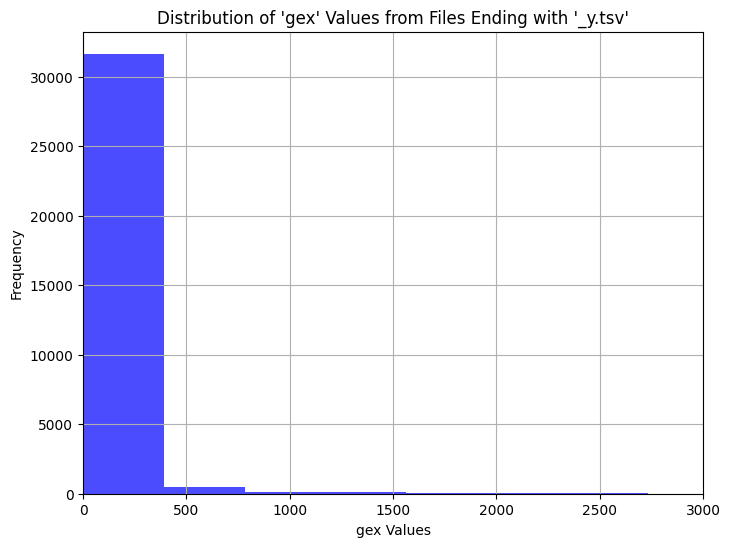

In [37]:
y_files = [file for file in tsv_files if file.endswith('_y.tsv')]

# Step 2: Read and collect 'gex' column data
gex_values = []

for tsv_file in y_files:
    df = pd.read_csv(tsv_file, delimiter='\t')
    
    # Ensure 'gex' column exists
    if 'gex' in df.columns:
        gex_filtered = df['gex'][(df['gex'] >= 0) & (df['gex'] <= 100)].dropna().values
        gex_values.extend(df['gex'].dropna().values)

# Step 3: Plot the distribution of 'gex' values
plt.figure(figsize=(8, 6))
plt.hist(gex_values, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of 'gex' Values from Files Ending with '_y.tsv'")
plt.xlabel('gex Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 3000)
plt.show()

In [40]:
len(gex_values)

32568

In [22]:
dfs

[      gene_name          gex
 0       SLC20A1     0.000000
 1      C11orf58  2239.103328
 2        ZSCAN9    19.798064
 3          CD19   411.530623
 4       TMEM123    34.214129
 ...         ...          ...
 14305     ACOX1     0.000000
 14306     MLXIP     0.000000
 14307     ASGR2     0.000000
 14308     OR5A1     0.000000
 14309      TLR3     0.480536
 
 [14310 rows x 2 columns],
        gene_name   chr  gene_start   gene_end  TSS_start    TSS_end strand
 0          CAPN9  chr1   230747384  230802003  230791876  230791926      +
 1           ILF2  chr1   153661788  153671028  153664424  153664474      -
 2     ST6GALNAC5  chr1    76867480   77067546   76867440   76867490      +
 3     MROH7-TTC4  chr1    54641786   54742308   54641785   54641835      +
 4           AGO4  chr1    35808016   35857890   35841672   35841722      +
 ...          ...   ...         ...        ...        ...        ...    ...
 1979      BRINP2  chr1   177170958  177282422  177256780  177256830      +
 19

In [12]:
import pandas as pd
import zipfile
import os

# Replace 'your_file.zip' with the path to your actual zip file
zip_file_path = 'your_file.zip'
extracted_folder = 'extracted_files'

# Step 1: Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('unzipped_files')

# Step 2: List the .tsv files, ignoring __MACOSX files
tsv_files = []
for root, dirs, files in os.walk(extracted_folder):
    for file in files:
        if file.endswith('.tsv') and not file.startswith('._'):
            tsv_files.append(os.path.join(root, file))

# Step 3: Read and merge all .tsv files
dfs = []
for tsv_file in tsv_files:
    df = pd.read_csv(tsv_file, delimiter='\t')
    dfs.append(df)

# Combine all DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True)

# Step 4: Display the merged DataFrame
print(merged_df.head())

# Optionally, save the merged DataFrame to a new .csv or .tsv file
# merged_df.to_csv('merged_file.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'your_file.zip'

## Work Package 1.2 - Model Building

In [ ]:
# TODO: 
# Select the best model to predict gene expression from the obtained features in WP 1.1.

# ---------------------------INSERT CODE HERE---------------------------




# ----------------------------------------------------------------------


## Work Package 1.3 - Prediction on Test Data (Evaluation Metric)

In [ ]:
# TODO:
# Using the model trained in WP 1.2, make predictions on the test data (chr 1 of cell line X3).
# Store predictions in a variable called "pred" which is a numpy array.

pred = None
# ---------------------------INSERT CODE HERE---------------------------




# ----------------------------------------------------------------------

# Check if "pred" meets the specified constrains
assert isinstance(pred, np.ndarray), 'Prediction array must be a numpy array'
assert np.issubdtype(pred.dtype, np.number), 'Prediction array must be numeric'
assert pred.shape[0] == len(test_genes), 'Each gene should have a unique predicted expression'

#### Store Predictions in the Required Format

In [ ]:
# Store predictions in a ZIP. 
# Upload this zip on the project website under "Your submission".
# Zip this notebook along with the conda environment (and README, optional) and upload this under "Your code".

save_dir = 'path/to/save/output/file'  # TODO
file_name = 'gex_predicted.csv'         # PLEASE DO NOT CHANGE THIS
zip_name = "LastName_FirstName_Project1.zip" # TODO
save_path = f'{save_dir}/{zip_name}'
compression_options = dict(method="zip", archive_name=file_name)

test_genes['gex_predicted'] = pred.tolist()
test_genes[['gene_name', 'gex_predicted']].to_csv(save_path, compression=compression_options)